# Visualization

Visualizations, or visual represenations of data, are a powerful way to represent relationships of data in a way that humans can more effectively understand compared to textual data representations.  In this lecture, we will give a brief introduction to some of the basic visualization capabilities that are available in Python (with and without Pandas).  If you are interested more broadly in data visualization, you should consider LIS 2690 or CMPINF 2130 (offered this summer!)

## Bar Charts

Mathplotlib provides A LOT of functionality similar tothe charing features in Excel, but with a lot more control.  It also integrates will with Pandas.

Examples of all the visualizations can be found [here](https://matplotlib.org/3.1.1/gallery/index.html).

In [1]:
import pandas as pd

import scipy.stats as stats # <-- Use for some simple stats

import numpy as np  # <-- this is NumPy, used for numerical computing, we're not going to get in to it, but many of the examples use this package as helpers for the plotting code

import matplotlib.pyplot as plt # <-- MatPlotLib is one of the most used graphing packages used in Python

Let's jump in and load up a simple dataframe.  This is dataframe has information about a a drug trial and a measure of the result.

In [4]:
df = pd.read_csv("files/drug.csv")
df

,person,dose,result
0,1,1,3
1,2,1,2
2,3,1,1
3,4,1,1
4,5,1,4
5,6,2,5
6,7,2,2
7,8,2,4
8,9,2,2
9,10,2,3


We can use the set_index method to set the index of the dataframe:

In [13]:
df = df.set_index('person')
df

,dose,result
person,,
1,1,3
2,1,2
3,1,1
4,1,1
5,1,4
6,2,5
7,2,2
8,2,4
9,2,2


We can also use the replace function replace the number values with the meaning of the dosing categories:

In [17]:
df['dose'].replace({1: 'placebo', 2: 'low', 3: 'high'}, inplace = True)
df

,dose,result
person,,
1,placebo,3
2,placebo,2
3,placebo,1
4,placebo,1
5,placebo,4
6,low,5
7,low,2
8,low,4
9,low,2


We can use some of the simple statistics capabilities to help us get simple stats... we'll see later how this is useful

In [19]:
mask = df['dose'] == 'placebo'

df[mask].mean()['result']

2.2

In [20]:
df[mask].std()['result']

1.3038404810405297

Now, this is what I was struggling to show last week in the Activities... you can put the mask right in to the code:

In [21]:
df[df['dose'] == 'placebo'].mean()['result']

2.2

Alright, now let's get in to some plotting --- let's create a simple bar chart for the placebo

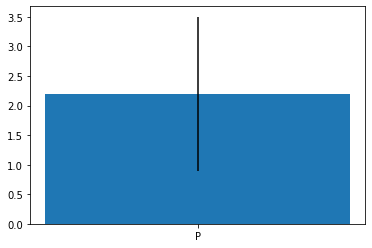

In [27]:
fig, ax = plt.subplots()

N = 1
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars

means = df[df['dose'] == 'placebo'].mean()['result']
std = df[df['dose'] == 'placebo'].std()['result']

ax.bar(ind, means , width, bottom=0, yerr=std)
plt.xticks(ind, ('Placebo'))
plt.show()

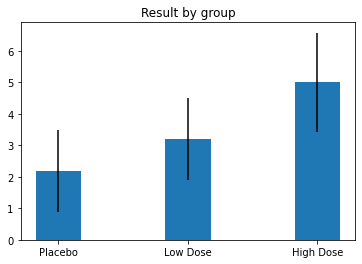

In [31]:
fig, ax = plt.subplots()

N = 3
ind = np.arange(N)    # the x locations for the groups
width = 0.35         # the width of the bars

means = [df[df['dose'] == 'placebo'].mean()['result'], df[df['dose'] == 'low'].mean()['result'], df[df['dose'] == 'high'].mean()['result']]
std = [df[df['dose'] == 'placebo'].std()['result'], df[df['dose'] == 'low'].std()['result'], df[df['dose'] == 'high'].std()['result']]

ax.bar(ind, means , width, bottom=0, yerr=std)
plt.title('Result by group')
plt.xticks(ind, ('Placebo', "Low Dose", "High Dose"))

plt.show()

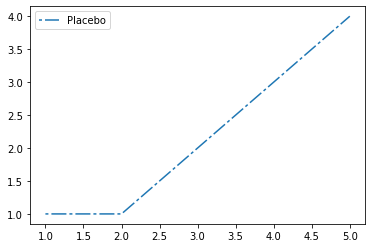

In [33]:
x = np.linspace(1, 5, 5)
y = df[df['dose'] == 'placebo']['result'].sort_values()

fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Placebo')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break


ax.legend()
plt.show()



In [34]:
x

array([1., 2., 3., 4., 5.])

In [35]:
y

person
3    1
4    1
2    2
1    3
5    4
Name: result, dtype: int64

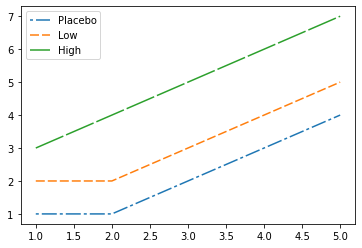

In [36]:
fig, ax = plt.subplots()

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(x, y, label='Placebo')
line1.set_dashes([2, 2, 10, 2])  # 2pt line, 2pt break, 10pt line, 2pt break

x2 = np.linspace(1, 5, 5)
y2 = df[df['dose'] == 'low']['result'].sort_values()

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(x2, y2, dashes=[6, 2], label='Low')


x3 = np.linspace(1, 5, 5)
y3 = df[df['dose'] == 'high']['result'].sort_values()

line3, = ax.plot(x3, y3, dashes=[20, 2], label='High')

ax.legend()
plt.show()

In [3]:
df_obesity = pd.read_csv("files/obesity-ac-2006-2010censustracts.csv")
df_fast_food_tract = pd.read_csv("files/fastfoodalleghenycountyupdatexy2plustract.csv")
df_fast_food_tract = df_fast_food_tract.dropna(subset=['tract'])
df_fast_food_tract['tract'] = df_fast_food_tract['tract'].astype('int32')
df_fast_food_tract_count = df_fast_food_tract.groupby('tract').count()
df_fast_food_tract_count = df_fast_food_tract_count.drop(['Name', 'Street Name', 'Legal Name', 'Start Date', 'Street Number', 'ZIP Code', 'Lat', 'Lon', 'Category'], axis=1).rename(columns={'Unnamed: 0' : 'count'})
df_merged = pd.merge(df_obesity, df_fast_food_tract_count, left_on='2000 Tract', right_on = 'tract', how='inner')
df_merged


,stname,tractfips,2000 Tract,2010 Tract,MUNICIPALITY,Municipality,City Neighborhood,2006-2010 estimate of obesity,count
0,Pennsylvania,42003010300,10300,NaN,PITTSBURGH,Pittsburgh,Bluff,0.246936,3
1,Pennsylvania,42003020100,20100,NaN,PITTSBURGH,Pittsburgh,Central Business District,0.668012,61
2,Pennsylvania,42003020300,20300,NaN,PITTSBURGH,Pittsburgh,Strip District,0.369996,5
3,Pennsylvania,42003030500,30500,NaN,PITTSBURGH,Pittsburgh,Crawford Roberts,0.488691,1
4,Pennsylvania,42003040400,40400,NaN,PITTSBURGH,Pittsburgh,North oakland,0.155867,5
...,...,...,...,...,...,...,...,...,...
187,Pennsylvania,42003564400,504400,5644,NORTH VERSAILLES,North Versailles,NaN,0.294694,6
188,Pennsylvania,42003980600,210800,980600,PITTSBURGH,Pittsburgh,Chateau,0.439386,3
189,Pennsylvania,42003980700,192100,980700,PITTSBURGH,Pittsburgh,South Shore,0.354375,1
190,Pennsylvania,42003981200,220500,563200 & 981200,PITTSBURGH,Pittsburgh,North Shore,0.121487,1


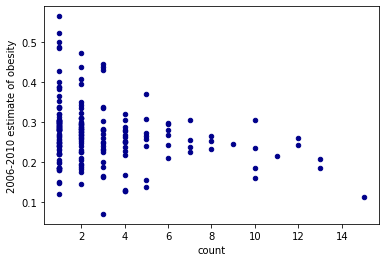

In [38]:
df_merged_no_outlier = df_merged.drop(1, axis=0)
ax2 = df_merged_no_outlier.plot.scatter(x='count', y='2006-2010 estimate of obesity',c='DarkBlue')

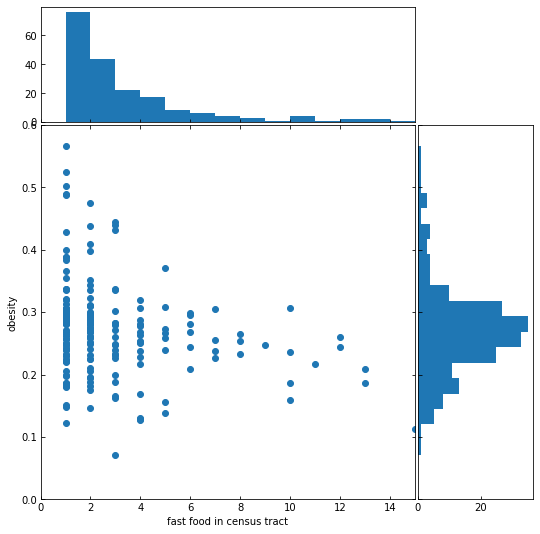

In [39]:
# the random data
x = df_merged_no_outlier['count']
y = df_merged_no_outlier['2006-2010 estimate of obesity']

# definitions for the axes
left, width = 0.2, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x, y)

# now determine nice limits by hand:
binwidth = 1
lim = np.ceil(np.abs(x).max() / binwidth) * binwidth
ax_scatter.set_xlim((0, lim))
ax_scatter.set_ylim((0, 0.6))

bins = np.arange(0, lim + binwidth, binwidth)
ax_histx.hist(x, bins=bins)
ax_histy.hist(y, bins=20, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

ax_scatter.set_ylabel('obesity')
ax_scatter.set_xlabel('fast food in census tract')


plt.show()

## Word Cloud
 
In the terminal run: conda install -c conda-forge wordcloud

In [5]:
from wordcloud import WordCloud, STOPWORDS 

In [6]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [7]:
imagine_lyrics = """
Imagine there's no countries
It isn't hard to do
Nothing to kill or die for
And no religion, too
Imagine all the people
Living life in peace
You, you may say I'm a dreamer
But I'm not the only one
I hope someday you will join us
And the world will be as one
Imagine no possessions
I wonder if you can
No need for greed or hunger
A brotherhood of man
Imagine all the people
Sharing all the world
You, you may say I'm a dreamer
But I'm not the only one
I hope someday you will join us
And the world will live as one
"""

In [8]:
import string 

imagine_lyrics = imagine_lyrics.translate(str.maketrans('', '', string.punctuation))
imagine_tokens = imagine_lyrics.split() 
for x in imagine_tokens :
    print(x)

Imagine
theres
no
countries
It
isnt
hard
to
do
Nothing
to
kill
or
die
for
And
no
religion
too
Imagine
all
the
people
Living
life
in
peace
You
you
may
say
Im
a
dreamer
But
Im
not
the
only
one
I
hope
someday
you
will
join
us
And
the
world
will
be
as
one
Imagine
no
possessions
I
wonder
if
you
can
No
need
for
greed
or
hunger
A
brotherhood
of
man
Imagine
all
the
people
Sharing
all
the
world
You
you
may
say
Im
a
dreamer
But
Im
not
the
only
one
I
hope
someday
you
will
join
us
And
the
world
will
live
as
one


In [9]:
for i in range(len(imagine_tokens)): 
        imagine_tokens[i] = imagine_tokens[i].lower() 

In [10]:
imagine_words = ' '
for word in imagine_tokens: 
    imagine_words = imagine_words + word + ' '
  
imagine_words

' imagine theres no countries it isnt hard to do nothing to kill or die for and no religion too imagine all the people living life in peace you you may say im a dreamer but im not the only one i hope someday you will join us and the world will be as one imagine no possessions i wonder if you can no need for greed or hunger a brotherhood of man imagine all the people sharing all the world you you may say im a dreamer but im not the only one i hope someday you will join us and the world will live as one '

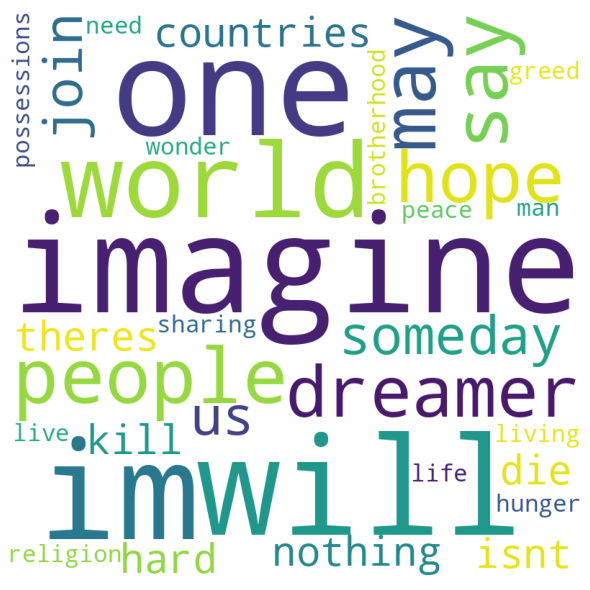

In [12]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = set(STOPWORDS), 
                min_font_size = 10).generate(imagine_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Geospatial visualization

conda install -c conda-forge descartes

conda install -c conda-forge geopandas

Expercise modeled after the example on Geopandas documentation and [GitHub example](https://github.com/bendoesdata/make-a-map-geopandas/blob/master/Let's%20make%20a%20map!%20Geopandas%20and%20Matplotlib.ipynb).

In [14]:
import geopandas as gpd

In [15]:
map_df = gpd.read_file('files/pitt_neighborhoods.shp')
map_df.head()

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,shape_ar_1,page_numbe,plannerass,created_us,created_da,last_edite,last_edi_1,Shape__Are,Shape__Len,geometry
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,7.843108e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.842997e+06,11525.904546,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,1.390463e+07,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.390469e+07,20945.562570,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,5.999801e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,5.998649e+06,18280.484515,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,7.202139e+06,15,Derek Dauphin,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,7.203337e+06,15697.914337,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,1.694785e+07,15,Andrea Lavin Kossis,pgh.admin,2019-10-23T14:17:16.403Z,pgh.admin,2019-10-23T14:17:16.403Z,1.694875e+07,24019.532672,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


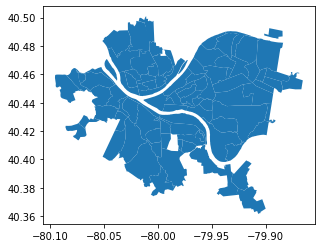

In [16]:
map_df.plot()

In [17]:
df_crime = pd.read_csv("files/burgh_crime.csv")
df_crime.head()

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2802309,16000001,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205.0,1.0,6.0,-80.012337,40.446263
1,2803174,16004547,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011.0,7.0,2.0,-79.950295,40.482290
2,2801809,16000367,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609.0,1.0,1.0,-80.000966,40.478651
3,2802315,16000035,10,2016-01-01T00:15:00,"300 Block Wood ST Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,HARRASSMENT/THREAT/ATTEMPT/PHY,2709(a)(3) Harassment No Legitimate Purpose,201.0,6.0,6.0,-80.001251,40.438918
4,2802312,16000024,4,2016-01-01T00:16:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,PROP MISSILE INTO OCC VEHICLE/OR ROADWAY,2705 Recklessy Endangering Another Person. / 3...,2609.0,1.0,1.0,-80.000966,40.478651


In [18]:
df_crime_count = df_crime.groupby('INCIDENTNEIGHBORHOOD').count()
df_crime_count

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
INCIDENTNEIGHBORHOOD,,,,,,,,,,,,,,
Allegheny Center,394,394,394,394,394,394,394,281,394,394,392,392,394,394
Allegheny West,127,127,127,127,127,127,127,86,127,127,125,125,127,127
Allentown,623,623,623,623,623,623,623,408,623,623,614,614,623,623
Arlington,198,198,198,198,198,198,198,146,198,198,198,198,198,198
Arlington Heights,30,30,30,30,30,30,30,23,30,30,30,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,205,205,205,205,205,205,205,148,205,205,198,198,205,205
West End,144,144,144,144,144,144,144,55,144,144,133,133,144,144
West Oakland,188,188,188,188,188,188,188,117,188,188,185,185,188,188


In [20]:
map_merged4 = map_df.merge(df_crime_count, left_on="hood", right_on="INCIDENTNEIGHBORHOOD")
map_merged4

,objectid,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,0.0,42,003,040500,1,420030405001,Block Group 1,G5030,S,...,566,566,566,456,566,566,564,564,566,566
1,2,1.0,42,003,040400,1,420030404001,Block Group 1,G5030,S,...,363,363,363,234,363,363,355,355,363,363
2,3,2.0,42,003,040200,2,420030402002,Block Group 2,G5030,S,...,188,188,188,117,188,188,185,185,188,188
3,4,3.0,42,003,030500,2,420030305002,Block Group 2,G5030,S,...,345,345,345,243,345,345,337,337,345,345
4,5,5.0,42,003,020300,1,420030203001,Block Group 1,G5030,S,...,418,418,418,270,418,418,405,405,418,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,88,298.0,42,003,563100,3,420035631003,Block Group 3,G5030,S,...,25,25,25,16,25,25,24,24,25,25
85,89,32.0,42,003,562600,1,420035626001,Block Group 1,G5030,S,...,144,144,144,55,144,144,133,133,144,144
86,90,57.0,42,003,250700,1,420032507001,Block Group 1,G5030,S,...,198,198,198,115,198,198,198,198,198,198
87,91,96.0,42,003,562300,2,420035623002,Block Group 2,G5030,S,...,68,68,68,50,68,68,67,67,68,68


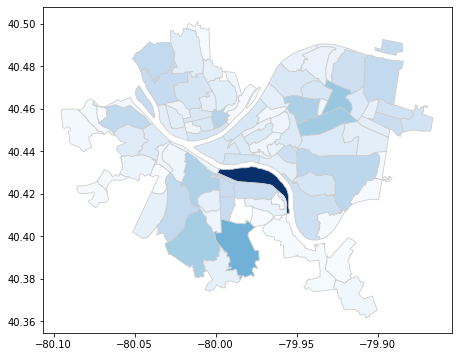

In [21]:
variable = 'OFFENSES'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
map_merged4.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
plt.show()

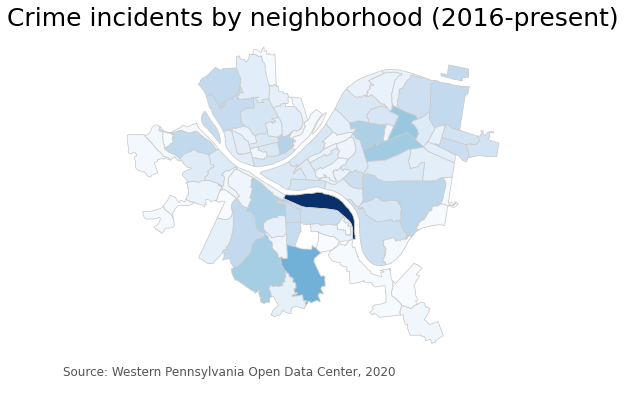

In [22]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))

# create map
map_merged4.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')

# add a title
ax.set_title('Crime incidents by neighborhood (2016-present)', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Western Pennsylvania Open Data Center, 2020',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
plt.show()

In [23]:
map_merged4['OFFENSES'].max()

2486

In [24]:
# set the range for the choropleth
vmin, vmax = 0, map_merged4['OFFENSES'].max()

In [ ]:
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(13, 6))

# create map
map_merged4.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

ax.axis('off')

# add a title
ax.set_title('Crime incidents by neighborhood (2016-present)', fontdict={'fontsize': '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Source: Western Pennsylvania Open Data Center, 2020',xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)

plt.show()